In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap

In [3]:
file = 'clean_data_v1.csv'
data = pd.read_csv(file, index_col = 0)
data.head()

IncidentDate IncidentTime  Incident Location: Street/Highway  \
0   2020-04-01     00:12:00                                  1   
1   2020-04-01     01:30:00                                  1   
2   2020-04-01     03:30:00                                  0   
3   2020-04-01     04:25:00                                  0   
4   2020-04-01     04:12:00                                  0   

   Incident Location: Public Transport  Incident Location: Retail Premises  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

   Incident Location: Open ground (e.g. park, car park, field)  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Incident Location: Licensed Premises  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Incident Location: Sports or Event Stadia  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Incident Location: Hospital/A&E (non-mental-health setting)  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Incident Location: Mental Health Setting  ...  SubjectGender: Male  \
0                                         0  ...                    1   
1                                         0  ...                    0   
2                                         0  ...                    0   
3                                         0  ...                    1   
4                                         0  ...                    0   

   SubjectGender: Other  SubjectEthnicity: Asian  SubjectEthnicity: Black  \
0                     0                        0                        0   
1                     0                        0                        0   
2                     0                        0                        0   
3                     0                        0                        0   
4                     0                        0                        0   

   SubjectEthnicity: Chinese  SubjectEthnicity: Unknown  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   SubjectEthnicity: Mixed SubjectEthnicity: Other  SubjectEthnicity: White  \
0                        0                       0                        1   
1                        0                       0                        1   
2                        0                       0                        1   
3                        0                       0                        1   
4                        0                       0                        1   

   Was Force Needed?  
0                  0  
1               

What suburbs are in this dataset?

In [22]:
suburbs = dict(data['Borough'].value_counts())

In [24]:
suburbdf = pd.DataFrame.from_dict(suburbs, orient='index', columns = ['Incidents'])

In [25]:
suburbdf

Incidents
City of Westminster         10239
Lambeth                      7274
Newham                       7160
Croydon                      7119
Southwark                    6802
Brent                        6528
Tower Hamlets                6192
Hackney                      5960
Lewisham                     5884
Camden                       5560
Haringey                     5071
Greenwich                    4855
Ealing                       4797
Barking and Dagenham         4258
Wandsworth                   4210
Islington                    4164
Waltham Forest               4044
Barnet                       3999
Hammersmith and Fulham       3900
Hillingdon                   3804
Enfield                      3802
Bromley                      3788
Hounslow                     3601
Redbridge                    3541
Havering                     3464
Bexley                       3192
Kensington and Chelsea       2707
Harrow                       2563
Kingston upon Thames         2487
Sutton                       1844
Merton                       1839
Richmond upon Thames         1412
Out of force                 1107
Heathrow                      728

In [115]:
# initialize lattitude and longitude
longitude = []
latitude = []

# Gathering latitude and longitude coordinates from google

In [116]:
#westminster
westminster = [51.5145, 0.1595]
lambeth = [51.4571, 0.1231]
newham = [51.5255, 0.0352]
croydon = [51.3762, 0.0982]
southwark = [51.4881, 0.0763]
brent = [51.5673, 0.2711]
tower_hamlets = [51.5203, 0.0293]
hackney = [51.5734, 0.0724]
lewisham = [51.4415, 0.0117]
camden = [51.5455, 0.1628]
haringey = [51.5906, 0.1110]
greenwich = [51.4934, 0.0098]
ealing = [51.5250, 0.3414]
barking_and_dagenham = [51.5541, 0.1340]
wandsworth = [51.4568, 0.1897]
islington = [51.5465, 0.1058]
waltham_forest = [51.5886, 0.0118]
barnet = [51.6050, 0.2076]
hammersmith_and_fulham = [51.4990, 0.2291]
hillingdon = [51.5352, 0.4481]
enfield = [51.6623, 0.1181]
bromley = [51.4060, 0.0132]
hounslow = [51.4828, 0.3882]
redbridge = [51.5886, 0.0824]
havering = [51.5779, 0.2121]
bexley = [51.4399, 0.1543]
kensington_and_chelsea = [51.4991, 0.1938]
harrow = [51.5806, 0.3420]
kingston_upon_thames = [51.4123, 0.3007]
sutton = [51.3614, 0.1940]
merton = [51.4098, 0.2108]
richmond_upon_thames = [51.4613, 0.3037]
out_of_force = [51.7520, 1.2577] # out of force jurisdiction // setting coordinates for oxford
heathrow = [51.4700, 0.4543]

In [117]:
geolocations = [
    westminster,
    lambeth,
    newham,
    croydon,
    southwark,
    brent,
    tower_hamlets,
    hackney,
    lewisham,
    camden,
    haringey,
    greenwich,
    ealing,
    barking_and_dagenham,
    wandsworth,
    islington,
    waltham_forest,
    barnet,
    hammersmith_and_fulham,
    hillingdon,
    enfield,
    bromley,
    hounslow,
    redbridge,
    havering,
    bexley,
    kensington_and_chelsea,
    harrow,
    kingston_upon_thames,
    sutton,
    merton,
    richmond_upon_thames,
    out_of_force,
    heathrow
]

In [118]:
for i in geolocations:
    longitude.append(i[0])
    latitude.append(i[1])

In [119]:
print(len(longitude))
print(len(latitude))
print(suburbdf.shape)

34
34
(34, 4)


In [120]:
suburbdf['longitude'] = longitude
suburbdf['latitude'] = latitude
suburbdf['name'] = suburbdf.index
suburbdf

Incidents  longitude  latitude                    name
City of Westminster         10239    51.5145    0.1595     City of Westminster
Lambeth                      7274    51.4571    0.1231                 Lambeth
Newham                       7160    51.5255    0.0352                  Newham
Croydon                      7119    51.3762    0.0982                 Croydon
Southwark                    6802    51.4881    0.0763               Southwark
Brent                        6528    51.5673    0.2711                   Brent
Tower Hamlets                6192    51.5203    0.0293           Tower Hamlets
Hackney                      5960    51.5734    0.0724                 Hackney
Lewisham                     5884    51.4415    0.0117                Lewisham
Camden                       5560    51.5455    0.1628                  Camden
Haringey                     5071    51.5906    0.1110                Haringey
Greenwich                    4855    51.4934    0.0098               Greenwich
Ealing                       4797    51.5250    0.3414                  Ealing
Barking and Dagenham         4258    51.5541    0.1340    Barking and Dagenham
Wandsworth                   4210    51.4568    0.1897              Wandsworth
Islington                    4164    51.5465    0.1058               Islington
Waltham Forest               4044    51.5886    0.0118          Waltham Forest
Barnet                       3999    51.6050    0.2076                  Barnet
Hammersmith and Fulham       3900    51.4990    0.2291  Hammersmith and Fulham
Hillingdon                   3804    51.5352    0.4481              Hillingdon
Enfield                      3802    51.6623    0.1181                 Enfield
Bromley                      3788    51.4060    0.0132                 Bromley
Hounslow                     3601    51.4828    0.3882                Hounslow
Redbridge                    3541    51.5886    0.0824               Redbridge
Havering                     3464    51.5779    0.2121                Havering
Bexley                       3192    51.4399    0.1543                  Bexley
Kensington and Chelsea       2707    51.4991    0.1938  Kensington and Chelsea
Harrow                       2563    51.5806    0.3420                  Harrow
Kingston upon Thames         2487    51.4123    0.3007    Kingston upon Thames
Sutton                       1844    51.3614    0.1940                  Sutton
Merton                       1839    51.4098    0.2108                  Merton
Richmond upon Thames         1412    51.4613    0.3037    Richmond upon Thames
Out of force                 1107    51.7520    1.2577            Out of force
Heathrow                      728    51.4700    0.4543                Heathrow

# Adding lat and long to dataframe

In [95]:
data['longitude'] = data['Borough']
data

0                       Barnet
1                      Enfield
2                     Lewisham
3                     Haringey
4          City of Westminster
                  ...         
147890                 Lambeth
147891                  Barnet
147892                 Bromley
147893                  Bexley
147894    Barking and Dagenham
Name: longitude, Length: 147895, dtype: object

In [97]:
longitudes = {'City of Westminster': 51.5145, 
              'Lambeth': 51.4571, 'Newham': 51.5255, 
              'Croydon': 51.3762, 'Southwark': 51.4881, 
              'Brent': 51.5673, 'Tower Hamlets': 51.5203, 
              'Hackney': 51.5734, 'Lewisham': 51.4415, 
              'Camden': 51.5455, 'Haringey': 51.5906, 
              'Greenwich': 51.4934, 'Ealing': 51.5250, 
              'Barking and Dagenham': 51.5541, 'Wandsworth': 51.4568, 
              'Islington': 51.5465, 'Waltham Forest': 51.5886, 
              'Barnet': 51.6050, 'Hammersmith and Fulham': 51.4990, 
              'Hillingdon': 51.5352, 'Enfield': 51.6623, 'Bromley': 51.4060, 
              'Hounslow': 51.4828, 'Redbridge': 51.5886, 'Havering': 51.5779, 
              'Bexley': 51.4399, 'Kensington and Chelsea': 51.4991, 
              'Harrow': 51.5806, 'Kingston upon Thames': 51.4123, 
              'Sutton': 51.3614, 'Merton': 51.4098, 'Richmond upon Thames': 51.4613, 
              'Out of force': 51.7520, 'Heathrow': 51.4700}

latitudes = {'City of Westminster': 0.1595, 
             'Lambeth': 0.1231, 'Newham': 0.0352, 
             'Croydon': 0.0982, 'Southwark': 0.0763, 
             'Brent': 0.2711, 'Tower Hamlets': 0.0293, 
             'Hackney': 0.0724, 'Lewisham': 0.0117, 'Camden': 0.1628, 
             'Haringey': 0.1110, 'Greenwich': 0.0098, 'Ealing': 0.3414, 
             'Barking and Dagenham': 0.1340, 'Wandsworth': 0.1897, 
             'Islington': 0.1058, 'Waltham Forest': 0.0118, 'Barnet': 0.2076, 
             'Hammersmith and Fulham': 0.2291, 'Hillingdon': 0.4481, 
             'Enfield': 0.1181, 'Bromley': 0.0132, 'Hounslow': 0.3882, 
             'Redbridge': 0.0824, 'Havering': 0.2121, 'Bexley': 0.1543, 
             'Kensington and Chelsea': 0.1938, 'Harrow': 0.3420, 
             'Kingston upon Thames': 0.3007, 'Sutton': 0.1940, 
             'Merton': 0.2108, 'Richmond upon Thames': 0.3037, 
             'Out of force': 1.2577, 'Heathrow': 0.4543}



In [98]:
data['longitude'] = data['longitude'].map(longitudes)
data['longitude'].value_counts()

51.5145    10239
51.5886     7585
51.4571     7274
51.5255     7160
51.3762     7119
51.4881     6802
51.5673     6528
51.5203     6192
51.5734     5960
51.4415     5884
51.5455     5560
51.5906     5071
51.4934     4855
51.5250     4797
51.5541     4258
51.4568     4210
51.5465     4164
51.6050     3999
51.4990     3900
51.5352     3804
51.6623     3802
51.4060     3788
51.4828     3601
51.5779     3464
51.4399     3192
51.4991     2707
51.5806     2563
51.4123     2487
51.3614     1844
51.4098     1839
51.4613     1412
51.7520     1107
51.4700      728
Name: longitude, dtype: int64

In [99]:
data['latitudes'] = data['Borough']
data['latitudes'] = data['latitudes'].map(latitudes)
data['latitudes'].value_counts()

0.1595    10239
0.1231     7274
0.0352     7160
0.0982     7119
0.0763     6802
0.2711     6528
0.0293     6192
0.0724     5960
0.0117     5884
0.1628     5560
0.1110     5071
0.0098     4855
0.3414     4797
0.1340     4258
0.1897     4210
0.1058     4164
0.0118     4044
0.2076     3999
0.2291     3900
0.4481     3804
0.1181     3802
0.0132     3788
0.3882     3601
0.0824     3541
0.2121     3464
0.1543     3192
0.1938     2707
0.3420     2563
0.3007     2487
0.1940     1844
0.2108     1839
0.3037     1412
1.2577     1107
0.4543      728
Name: latitudes, dtype: int64

In [100]:
data.head()

IncidentDate IncidentTime  Incident Location: Street/Highway  \
0   2020-04-01     00:12:00                                  1   
1   2020-04-01     01:30:00                                  1   
2   2020-04-01     03:30:00                                  0   
3   2020-04-01     04:25:00                                  0   
4   2020-04-01     04:12:00                                  0   

   Incident Location: Public Transport  Incident Location: Retail Premises  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

   Incident Location: Open ground (e.g. park, car park, field)  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Incident Location: Licensed Premises  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Incident Location: Sports or Event Stadia  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Incident Location: Hospital/A&E (non-mental-health setting)  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Incident Location: Mental Health Setting  ...  SubjectEthnicity: Asian  \
0                                         0  ...                        0   
1                                         0  ...                        0   
2                                         0  ...                        0   
3                                         0  ...                        0   
4                                         0  ...                        0   

   SubjectEthnicity: Black  SubjectEthnicity: Chinese  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   SubjectEthnicity: Unknown  SubjectEthnicity: Mixed  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   SubjectEthnicity: Other  SubjectEthnicity: White Was Force Needed?  \
0                        0                        1                 0   
1                        0                        1                 1   
2                        0                        1                 1   
3                        0                        1                 1   
4                        0                        1                 1   

   longitude  latitudes  
0    51.6050     0.2076  
1    51.6623     0.1181  
2    51.4415     0.0117  
3    51.5906     0.1110  
4    51.5145     0.1595  

[5 rows x 80 columns]

# Creating Heatmaps

In [106]:
heatmap = folium.Map([51.5074, 0.1278], zoom_start = 10)
HeatMap(data[['longitude','latitudes']].groupby(['longitude','latitudes']).sum().reset_index().values.tolist(), radius = 20, max_zoom = 13).add_to(heatmap)
display(heatmap)

In [127]:
heatmap = folium.Map([51.5074, 0.1278], zoom_start = 10)
HeatMap(data[['longitude','latitudes']].groupby(['longitude','latitudes']).sum().reset_index().values.tolist(),
        max_opacity = 0.6, radius = 40, max_zoom = 13).add_to(heatmap)
for i in range(len(suburbdf)):
    folium.Marker([suburbdf.iloc[i]['longitude'], suburbdf.iloc[i]['latitude']],popup=suburbdf.iloc[i]['name']).add_to(heatmap)
display(heatmap)

In [164]:
heatmap = folium.Map([51.5074, 0.1278], zoom_start = 10)
HeatMap(data[['longitude','latitudes']],
        max_opacity = 0.6, radius = 20, max_zoom = 13).add_to(heatmap)
for i in range(len(suburbdf)):
    folium.Marker([suburbdf.iloc[i]['longitude'], suburbdf.iloc[i]['latitude']],popup=suburbdf.iloc[i]['name']).add_to(heatmap)
display(heatmap)

In [134]:
suburbdf

Incidents  longitude  latitude                    name
City of Westminster         10239    51.5145    0.1595     City of Westminster
Lambeth                      7274    51.4571    0.1231                 Lambeth
Newham                       7160    51.5255    0.0352                  Newham
Croydon                      7119    51.3762    0.0982                 Croydon
Southwark                    6802    51.4881    0.0763               Southwark
Brent                        6528    51.5673    0.2711                   Brent
Tower Hamlets                6192    51.5203    0.0293           Tower Hamlets
Hackney                      5960    51.5734    0.0724                 Hackney
Lewisham                     5884    51.4415    0.0117                Lewisham
Camden                       5560    51.5455    0.1628                  Camden
Haringey                     5071    51.5906    0.1110                Haringey
Greenwich                    4855    51.4934    0.0098               Greenwich
Ealing                       4797    51.5250    0.3414                  Ealing
Barking and Dagenham         4258    51.5541    0.1340    Barking and Dagenham
Wandsworth                   4210    51.4568    0.1897              Wandsworth
Islington                    4164    51.5465    0.1058               Islington
Waltham Forest               4044    51.5886    0.0118          Waltham Forest
Barnet                       3999    51.6050    0.2076                  Barnet
Hammersmith and Fulham       3900    51.4990    0.2291  Hammersmith and Fulham
Hillingdon                   3804    51.5352    0.4481              Hillingdon
Enfield                      3802    51.6623    0.1181                 Enfield
Bromley                      3788    51.4060    0.0132                 Bromley
Hounslow                     3601    51.4828    0.3882                Hounslow
Redbridge                    3541    51.5886    0.0824               Redbridge
Havering                     3464    51.5779    0.2121                Havering
Bexley                       3192    51.4399    0.1543                  Bexley
Kensington and Chelsea       2707    51.4991    0.1938  Kensington and Chelsea
Harrow                       2563    51.5806    0.3420                  Harrow
Kingston upon Thames         2487    51.4123    0.3007    Kingston upon Thames
Sutton                       1844    51.3614    0.1940                  Sutton
Merton                       1839    51.4098    0.2108                  Merton
Richmond upon Thames         1412    51.4613    0.3037    Richmond upon Thames
Out of force                 1107    51.7520    1.2577            Out of force
Heathrow                      728    51.4700    0.4543                Heathrow

In [139]:
print(sum(suburbdf['Incidents']))

147895


In [150]:
piechart = suburbdf.iloc[:10, :]
piechart

Incidents  longitude  latitude                 name
City of Westminster      10239    51.5145    0.1595  City of Westminster
Lambeth                   7274    51.4571    0.1231              Lambeth
Newham                    7160    51.5255    0.0352               Newham
Croydon                   7119    51.3762    0.0982              Croydon
Southwark                 6802    51.4881    0.0763            Southwark
Brent                     6528    51.5673    0.2711                Brent
Tower Hamlets             6192    51.5203    0.0293        Tower Hamlets
Hackney                   5960    51.5734    0.0724              Hackney
Lewisham                  5884    51.4415    0.0117             Lewisham
Camden                    5560    51.5455    0.1628               Camden

In [140]:
print(sum(piechart['Incidents']))

68718


In [151]:
other = {
    'Incidents': 79177,
    'longitude': 0,
    'latitude': 0,
    'name': 'Other'
}
piechart.append(other, ignore_index = True)

Incidents  longitude  latitude                 name
0       10239    51.5145    0.1595  City of Westminster
1        7274    51.4571    0.1231              Lambeth
2        7160    51.5255    0.0352               Newham
3        7119    51.3762    0.0982              Croydon
4        6802    51.4881    0.0763            Southwark
5        6528    51.5673    0.2711                Brent
6        6192    51.5203    0.0293        Tower Hamlets
7        5960    51.5734    0.0724              Hackney
8        5884    51.4415    0.0117             Lewisham
9        5560    51.5455    0.1628               Camden
10      79177     0.0000    0.0000                Other

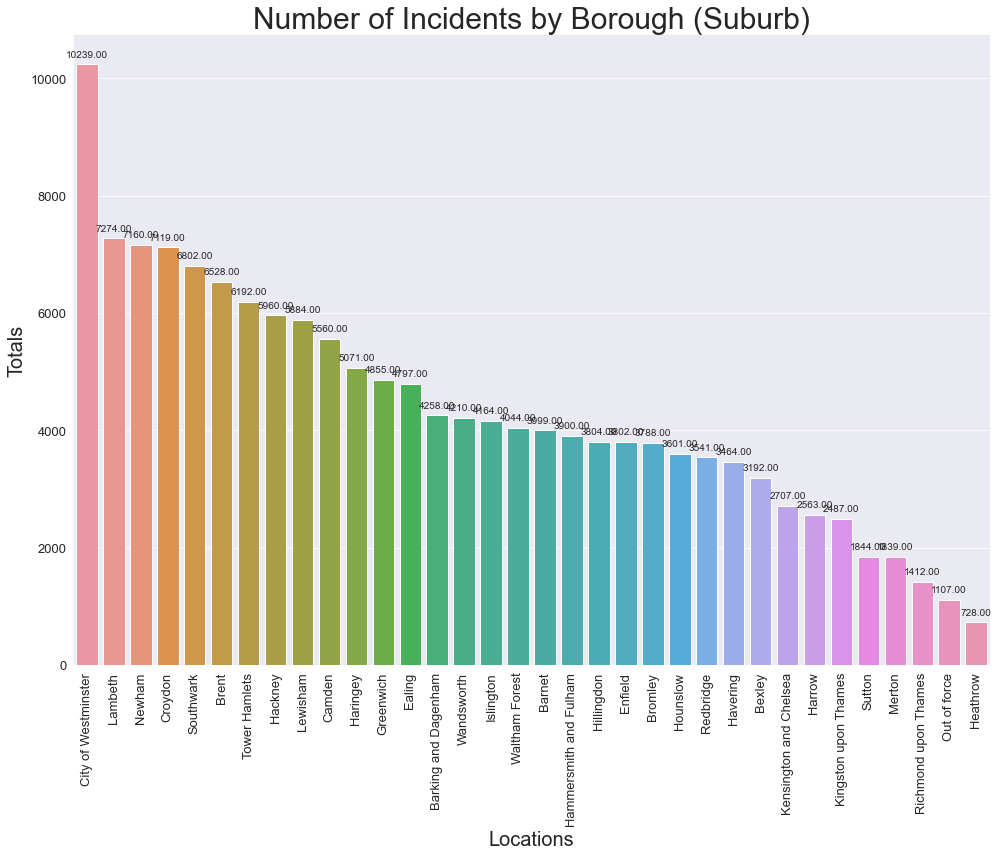

In [155]:
plt.figure(figsize=(14,12))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x = suburbdf['name'], y = suburbdf['Incidents'])
ax.set_xlabel('Locations', fontsize = 20)
ax.set_ylabel('Totals', fontsize = 20)
ax.axes.set_title('Number of Incidents by Borough (Suburb)', fontsize = 30)
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha =  'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout()

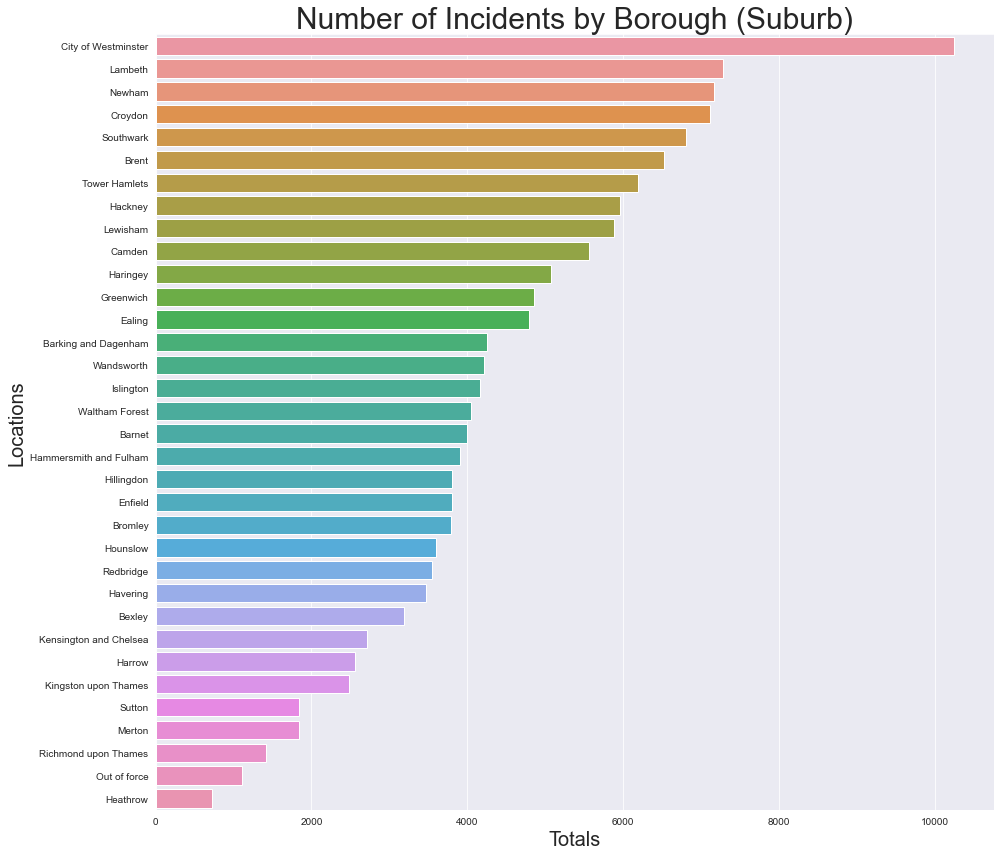

In [161]:
plt.figure(figsize=(14,12))
ax = sns.set_style('darkgrid')
ax = sns.barplot(y = suburbdf['name'], x = suburbdf['Incidents'])
ax.set_ylabel('Locations', fontsize = 20)
ax.set_xlabel('Totals', fontsize = 20)
ax.axes.set_title('Number of Incidents by Borough (Suburb)', fontsize = 30)
plt.xticks()
plt.tick_params(labelsize = 10)
plt.tight_layout()